# Logistic regression classifier

In this notebook, we implement logistic regression classifier described in Section 4.3 of the book PRML. 

In [1]:
import time
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

%matplotlib inline
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 1. Setting 

* Let $N \in \mathbb{N}$ be the number of training data points, 
* $d \in \mathbb{N}$ be the dimension of input, 
* $\mathcal{C} = \left\{ 0, 1, \dots, C-1 \right\}$ be the set of class labels, 
* $x_0, x_1, \dots , x_{N-1} \in \mathbb{R}^d$ be the training input data, $y_0, y_1, \dots, y_{N-1} \in \mathcal{C}$ be the training labels, and
$y := (y_0, \dots, y_{N-1})^T \in \mathcal{C}^N$.
* Let $t_n \in \left\{0,1\right\}^{C}$ be the 1-of-$C$ coding of $y_n$, i.e., for $y_n = c$, $t_n$ is a vector with its $c$ th component being 1 and other components being zero. 

# 2. Theory 

## 2.1 Model

We consider the following discriminative model (equation (4.104) in PRML)
$$
\begin{align}
    p(y|x,\theta) = \frac{\exp\left[{\theta^{(y)}}^T \phi(x)\right] }{ \sum_{y'=0}^{C-1} \exp\left[{\theta^{(y')}}^T \phi(x)\right] }
\end{align}
$$
where
* $\phi : \mathbb{R}^d \rightarrow \mathbb{R}^M $, $\phi(x) = (\phi_0(x), \dots, \phi_{M-1}(x))^T$ are basis functions,  
* $\theta^{(y)} \in \mathbb{R}^M$ are weight parameters, and 
* $\theta = \left( {\theta^{(0)}}^T, \dots, {\theta^{(C-1)}}^T  \right)^T \in \mathbb{R}^{CM}$

Later, we use "linear" basis function
$$
\begin{align}
    \phi_j(x) = \begin{cases}
        1 & (j=0)\\
        x^{(j-1)} & (j = 1.\dots, d) 
    \end{cases}
\end{align},
$$
where $x^{(j)}$ represents $j$-th element of $x \in \mathbb{R}^d$


Let $\Phi$ be a $N \times M$ matrix defined by
\begin{equation}
    \Phi = (\Phi_{i,j}), \ \ \Phi_{i,j} = \phi_j(x_i)
\end{equation}

## 2.2 Cost function and its derivatives

### 2.2.1 Cost function

In training a logistic classifier, we select the parameter that minimizes the following cost function (See equations (4.107) and (4.108) in PRML) : 
$$
\begin{align}
    J(\theta) :=  - \frac{1}{N} \sum_{n=0}^{N-1} \sum_{c=0}^{C-1} t_{n,c} \log p_{n,c} + \frac{\lambda}{2N} \| \theta \|^2, 
\end{align}
$$
where 
$$
\begin{align}
    p_{n,c} &:= p(c|x_n,\theta) = \frac{\exp\left[{\theta^{(c)}}^T \phi(x_n)\right] }{ \sum_{c'=0}^{C-1} \exp\left[ {\theta^{(c')}}^T \phi(x_n)  \right]}  \\
    t_{n,c} &:= \delta_{y_n, c}
\end{align}
$$
the first term is negative log likelihood, and the second term is a $l^2$ regularization term.

### 2.2.2 Gradient

To perform the minimization, we need the gradient of the cost function, which is given by (See equation (4.109) in PRML)
$$
\begin{align}
    \frac{\partial J}{\partial \theta^{(c)}_{j}} = 
        \frac{1}{N} \sum_{n=0}^{N-1} ( p_{n,c} -  t_{n,c}) \phi_j(x_n) + \frac{\lambda}{N} \theta^{(c)}_{j}
\end{align}
$$

### 2.2.3 Hessian

Later, we use the second derivative, or Hessian, of the cost function to perform minimization (Newton-Raphson) method. Here, the Hessian is given by (See equation (4.110) in PRML)
$$
\begin{align}
    H_{(c, j), (c', j')} &:= \frac{\partial^2 J}{\partial \theta^{(c)}_{j} \partial \theta^{(c')}_{j'}} \\
    &= \frac{1}{N} \sum_{n=0}^{N-1} p_{n, c} \left( \delta_{c, c'} - p_{n, c'}\right) \Phi_{n, j} \Phi_{n, j'}
    {} + \frac{\lambda}{N} \delta_{c, c'} \delta_{j, j'} 
\end{align}
$$

## 2.3 Minimization of the cost function

In contrast to the linear regression cases discussed in Chapter 3 of PRML, we now have a cost function which cannot be analytically minimized. Thus, we resort to numerical minimization of the cost function. 

Here we try two methods: gradient descent and Newton-Raphson method. 

### 2.3.1 Gradient Descent

In gradient descent method, we iteratively update our variable in the direction of gradient, i.e., if we denote the function to be minimized by $f$ and its variable by $x$, then in the $n$-th step of iteration, we have
$$
\begin{align}
    x_{n+1} = x_n - \alpha \nabla f(x_n)
\end{align}
$$
where $\alpha > 0$ is learning rate, which should be specified by the user.

### 2.3.2 Newton method

In Newton-Raphson algorithm, we utilize the information of second derivative. More specifically, if we denote
* the function to be minimized by $f$, 
* the Hessian of the function by $H$, and
* the variable by $x$, 

then in $n$-th step, we have
$$
\begin{align}
    x_{n+1} = x_{n} - \left[H(x_n)\right]^{-1} \nabla f(x_n)
\end{align}
$$

We can calculate the second term $\left[H(x_n)\right]^{-1} \nabla f(x_n)$ exactly (for example, by LU decomposition or directly inverting $H$) or approximately by iterative method such as conjugate gradient. One advantage of the iterative methods is that it does not require the matrix itself, and only needs the function which gives the product of the matrix and an arbitrary vector. We will come back to this point later in this notebook.

### 2.3.3 Comparison

Because Newton-Raphson method requires the information of Hessian and solving the linear equation corresponding it, the computational cost for each iteration is higher than that of gradient descent. 
However, it usually converges much faster than gradient descent in the sense that the number of iteration required is much smaller. 

In this noteobook, we implement both methods (especially, for Newton method, we implement both method for solving the linear equation), and compare their behavior.

For detail, also see a lecture by Prof. Andrew Ng https://www.youtube.com/watch?v=iwO0JPt59YQ

# 3. From math to code

## 3.1 Matrix representation

Here we express cost function and its gradient using a matrix notation. 
The following matrix will be used:
* $\Phi$ or `Phi` : `(N, M)` array, where `Phi[n, m]` = $\phi_m(x_n)$
* $\Theta$ or `Theta` : `(C, M)` array, where `Theta[c, j]` = $\theta^{(c)}_{j}$
* $T$ or `T` : `(N,C)` array, where `T[n, c]` = $t_{n, c}$
* $P$ or `P` : `(N, C)` array, where `P[n, c]` = $p_{n, c}$

Note that $P$ can be expressed by $\Phi$ and $\Theta$ as 

$$
\begin{align}
    P_{n,c} &= \frac{\exp\left[\sum_{j=0}^{M-1} \theta^{(c)}_{j} \phi_{j}(x_n)\right] }{ \sum_{c'=0}^{C-1} \exp\left[ \sum_{j=0}^{M-1} \theta^{(c')}_{j} \phi_{j}(x_n)  \right]} \\
    &= \frac{ \exp \left[ \left( \Phi \Theta^T \right)_{n, c'} \right]  }{ \sum_{c'=0}^{C-1} \exp\left[ \left( \Phi \Theta^T \right)_{n, c'} \right] }
\end{align}
$$

In [2]:
def calcPhimat(X):
    '''
    This function generates the design matrix Phi from X, the input data
        
    Parameters
    ----------
    X : 2-D numpy array
        (N,d) numpy array, with X[n, i] = i-th element of x_n
            
    Returns
    ----------
    Phi : 2-D numpy array
        The design matrix
    '''
    N = len(X)
    if len(np.shape(X)) == 1:
        d = 1
    else:
        d = np.shape(X)[1]
    Phi = np.zeros((N,d+1))
    Phi[:,0] = np.ones(N)
    Phi[:,1:] = np.reshape(X, (N,d))
    return Phi

def calcTmat(y, C):
    '''
    This function generates the matrix T from the training label y and the number of classes C
    
    Parameters
    ----------
    y : 1-D numpy array
        The elements of y should be integers in [0, C-1]
    C : int
        The number of classes
        
    Returns
    ----------
    T : (len(y), C) numpy array
        T[n, c] = 1 if y[n] == c else 0
    '''
    N = len(y)
    T = np.zeros((N, C))
    for c in range(C):
        T[:, c] = (y == c)
    return T

def calcPmat(Theta, Phi):
    '''
    This function generates the matrix P from the weight Theta and the design matrix Phi
    
    Parameters
    ----------
    Theta : 2-D numpy array
        Matrix representing the weight parameter
    Phi : 2-D numpy array
        The design matrix
        
    Returns
    ----------
    P : 2-D numpy array
    '''
    P = np.exp( Phi @ (Theta.T) )
    P = P/np.reshape( np.sum(P, axis= 1), (len(Phi),1)  ) 
    return P

## 3.2 Cost function and its derivatives

### 3.2.1 Cost function

With these definitions, for the cost function, we have
$$
\begin{align}
    J(\Theta) 
        &= - \frac{1}{N} \sum_{n=0}^{N-1} \sum_{c=0}^{C-1} t_{n,c} \log p_{n,c} + \frac{\lambda}{2N} \| \theta \|^2  \\
        &= -\frac{1}{N} sum(T \ast \log P) + \frac{\lambda}{2N} \| \Theta \|_{2}^{2}
\end{align}
$$
where $\log$ means elementwise log, $\ast$ means elementwise product, and, $sum$ means summing up all elements of a matrix. 

In [3]:
def cost_function(thtvec, Phi, T, lam):
    '''
    This function calculate the loss function and its gradient
    
    Parameters
    ----------
    thtvec : 1-D numpy array 
        (M*C,) array, which represents the weight parameter Theta, in flattened form
    Phi : 2-D numpy array
        (N, M) array, design matrix
    T : 2-D numpy array
        (N, C) array, where T[n, c] = 1 if y[n] == c else 0
    lam : float
        The regularization constant
    
    Returns
    ----------
    J : float
        The value of cost function        
    '''
    N, M = np.shape(Phi)
    C = np.shape(T)[1]
    Theta = np.reshape(thtvec, (C, M))
    P = calcPmat(Theta, Phi)
    J = -1.0/N*np.sum(T*np.log(P)) + lam/(2.0*N)*np.linalg.norm(thtvec)**2
    return J

### 3.2.2 Gradient

If we regard $\frac{\partial J(\Theta)}{\partial \Theta}$ as a matrix, then the gradient can be written as
$$
\begin{align}
    \frac{\partial J(\Theta)}{\partial \Theta}
    &= \left(  \frac{1}{N} \sum_{n=0}^{N-1} ( p_{n,c} -  t_{n,c}) \phi_j(x_n) + \frac{\lambda}{N} \theta^{(c)}_{j} \right)_{c,j} \\
    &= \frac{1}{N} (P-T)^T \Phi + \frac{\lambda}{N} \Theta. 
\end{align}
$$
Because our (and many other) minimization functions assume that gradient is given as a vector (or 1-D array), we convert the matrix (2-D array) by invoking `np.reshape`. 

In [4]:
def grad_cost_function(thtvec, Phi, T, lam):
    '''
    This function calculates the gradient of the cost function 
    
    Parameters
    ----------
    See the help for cost_function
        
    Returns
    ----------
    grad_vec : 2-D array
        The gradient of the cost function with respect to the weight parameter Theta, in flattened form
    '''
    N, M = np.shape(Phi)
    C = np.shape(T)[1]
    Theta = np.reshape(thtvec, (C, M))
    P = calcPmat(Theta, Phi)
    grad_mat = 1.0/N*((P - T).T) @ Phi + lam/N*Theta
    grad_vec = np.reshape(grad_mat, len(thtvec))
    return grad_vec

### 3.2.3 Hessian

Calculating Hessian is more complicated (Recall that our implementation of Newton-Raphson method assumes that Hessian is a matrix, i.e., it is 2-D array. ) . 
Before delving into the calculation, let us recall the analytic expression for the Hessian (We have rewritten indeices here).
$$
\begin{align}
    H_{(i, j), (k, l)} &= \frac{\partial^2 J}{\partial \theta^{(i)}_{j} \partial \theta^{(k)}_{l}} \\
    &= \frac{1}{N} \sum_{n=0}^{N-1} p_{n, i} \left( \delta_{i, k} - p_{n, k}\right) \Phi_{n, j} \Phi_{n, l}
    {} + \frac{\lambda}{N} \delta_{(i,j), (k,l)}
\end{align}
$$
Frist, we calculate a $(C, M, C, M)$ array corresponding to the first term, i.e., we treat the regularization term later, because it is just a $CM \times CM$ identity matrix. We can make use of numpy broadcasting and `np.einsum`. 

Note that the computational complexity of calculating the Hessian matrix is $\mathcal{O}(NM^2C^2)$, because we have to calculate $(CM)^2$ elements, and for each element we have summation over $N$ terms.

In [5]:
def hess_cost_function(thtvec, Phi, T, lam):
    '''
    This function calculates the Hessian of the cost function 
    
    Parameters
    ----------
    See the help for cost_function
    
    Returns
    ----------
    H : 2-D array
        The hessian
    '''
    N, M = np.shape(Phi)
    C = np.shape(T)[1]
    Theta = np.reshape(thtvec, (C, M))
    P = calcPmat(Theta, Phi)
    tmparr_A = np.reshape(P, (N, C, 1)) * ( np.reshape(np.identity(C), (1, C, C)) - np.reshape(P, (N, 1, C)) )
    tmparr_B = np.reshape(Phi, (N, M, 1)) * np.reshape(Phi, (N, 1, M)) 
    H_tmp = np.einsum('nik,njl->ijkl', tmparr_A, tmparr_B)/N
    H = np.reshape(H_tmp, (C*M, C*M)) + lam/N*np.identity(C*M)
    return H

### 3.2.4 Product of Hessian and vector

As was pointed out in Section 2.3.2, we do not need the Hessian matrix itself when we use iterative methods such as conjugate gradient to calculate $H^{-1}(x) \nabla f(x)$. Instead, it suffices to provide the function which returns the product of the matrix and an arbitrary input vector (for detail, see https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.cg.html). 
Here we give a function which returns such product function. The important point is that, the computational cost required to calculate the product is much less than the cost required for calculating the Hessian itself (We will evaluate the computational complexity of the process in the next paragraph.).

First, let us denote by `v` the `(C*M,)` input vector, and by $(V_{i,j})_{i= 0, \dots, C-1, j = 0, \dots, M-1}$ the matrix expression for the vector. 
The product of the input vector and Hessian is given by
$$
\begin{align}
    &{} \sum_{k,l}      H_{(i, j), (k, l)} V_{k, l} \\
    &= \sum_{k,l} \frac{\partial^2 J}{\partial \theta^{(i)}_{j} \partial \theta^{(k)}_{l}}  V_{k, l} \\
    &= \frac{1}{N} \sum_{n=0}^{N-1}\sum_{k,l} p_{n, i} \left( \delta_{i, k} - p_{n, k}\right) \Phi_{n, j} \Phi_{n, l} V_{k, l}
    {} + \frac{\lambda}{N} \sum_{k,l} \delta_{(i,j), (k,l)} V_{k,l} \\
    &= \frac{1}{N} \sum_{n=0}^{N-1} \left( \sum_{l} p_{n, i} \Phi_{n, j} \Phi_{n, l} V_{i, l}
        {} - \sum_{k,l}  p_{n, i} p_{n, k} \Phi_{n, j} \Phi_{n, l} V_{k, l} \right) + \frac{\lambda}{N} V_{i,j} \\
    &= \frac{1}{N} \sum_{n=0}^{N-1}  p_{n, i} \Phi_{n, j} \left( \sum_{l}  \Phi_{n, l} V_{i, l}
        {} - \sum_{k,l}  p_{n, k} \Phi_{n, l} V_{k, l} \right) + \frac{\lambda}{N} V_{i,j} \\
\end{align}
$$

The calculation can be done step by step as follows:
* First, we set `tmp[n, k]` $= \sum_{l=0}^{M-1} \Phi_{n, l} V_{k, l}$ = `(Phi @ V.T) [n, k]`. Thus, `tmp = Phi @ V.T`, and since `Phi` and 'V' are (N, M) array and (C, M) array respectively, the process takes $\mathcal{O}(NMC)$ time.
* Next, we calculate $ \sum_{l}  \Phi_{n, l} V_{i, l}- \sum_{k,l}  p_{n, k} \Phi_{n, l} V_{k, l}$ = `tmp[n, i]` $- \sum_{k=0}^{C-1}$ `P[n, k] * tmp[n, k]`, and set it as `tmp`. The process takes $\mathcal{O}(NC^2)$ time, if we first calculate all the product and take summation.
* Then, we calculate $\sum_{n=0}^{N-1}  p_{n, i} \Phi_{n, j} \left( \sum_{l}  \Phi_{n, l} V_{i, l}- \sum_{k,l}  p_{n, k} \Phi_{n, l} V_{k, l} \right)$ = $\sum_{n=0}^{N-1} $`P[n, i] * Phi[n, j] * tmp[n, i]` = $\sum_{n=0}^{N-1}$ `(P*tmp)[n, i] * Phi[n, j]` = `((P*tmp).T @ Phi)[i,j]`. The process takes $\mathcal{O}(NMC)$ time.

Thus, the computational complexity of the procedure is $\mathcal{O}(NC(M+C))$, which is smaller than the computational complexity for the calculation of Hessian matrix.

In [6]:
from scipy.sparse.linalg import LinearOperator

def hessp_cost_function(thtvec, Phi, T, lam):
    '''
    This function returns the function representing the product of Hessian and a given vector
    
    Parameters
    ----------
    See the help for cost_function
    
    Returns
    ----------
    A : scipy.sparse,linalg.LinearOperator object
        A linear operator representing the Hessian of the cost function
    '''
    N, M = np.shape(Phi)
    C = np.shape(T)[1]
    Theta = np.reshape(thtvec, (C, M))
    P = calcPmat(Theta, Phi)
    def hp(v):
        V = np.reshape(v, (C, M))
        tmp = Phi @ V.T
        tmp = tmp - np.reshape(np.sum(P*tmp, axis=1), (N, -1))
        product = ((P*tmp).T @ Phi)/N + lam/N*V
        product = product.flatten()
        return product
    A = LinearOperator((C*M, C*M), matvec=hp)
    return A

## 3.3 Minimization

Here, we use gradient descent and Newton-Raphson method to numerically minimize the cost function. The functions performing these minimization procedures are given below.

### 3.3.1 Gradient Descent

In gradient descent, we obtain an approximate optimal solution by the update
$$
\begin{align}
    x_{n+1} = x_n - \alpha \nabla f(x_n).
\end{align}
$$

Here, as to the stopping criterion, we examine the change of function value, and if it does not decrease more than the specified value `ftol`, we terminate the iteration.

In [7]:
def minimize_GD(func, x0, grad, alpha=0.01, maxiter=1e4, ftol=1e-5):
    '''
    This function minimizes the given function using gradient descent method
    
    Parameters
    ----------
    func : callable
        Function to be minimized (real-valued)
    x0 : 1-D array
        Initial value of the variable
    grad : callable
        The gradient of func (returns 1-D array)
    alpha : float
        Learning rate
    maxiter : int
        Maximum number of iteration
    ftol : float
        The threshold for stopping criterion. If the change of the value of function is smaller than this value, the iteration stops.
    
    Returns
    ----------
    result : dictionary
        result['x'] ... variable, result['nit'] ... the number of iteration, result['func']...the value of the function, result['success']... whether the minimization is successful or not
    '''
    x = x0
    nit = 0
    while nit < maxiter:
        xold = x
        x = x - alpha*grad(x)
        nit += 1
        if abs(func(x) - func(xold)) < ftol:
            break
    success = (nit < maxiter)
    return {'x': x, 'nit':nit, 'func':func(x), 'success':success}

### 3.3.2 Newton method

There are two ways for calculating the second term $\left[H(x_n)\right]^{-1} \nabla f(x_n)$: 
* One is to calculate the product by solving the linear equation $H(x_n) y = \nabla f(x_n)$ exactly using `numpy.linalg.solve`( https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.solve.html )
* The other one is to solve the linear equation approximately by conjugate gradient (CG) method using `scipy.sparse.linalg.cg`( https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.cg.html ), which can be applied to positive definite coefficient matrices.

While the first one is more conceptually straightforward, the second one is computationally more efficient (For detail, please consult with textbooks on numerical linear algebra.). 

It should be also noted that, `scipy.sparse.linalg.cg` does not require the matrix itself, but only needs a function giving the product of the coefficient matrix and an arbitrary vector. As was pointed out in Section 3.3.4, the computational complexity of this procedure is smaller than that of the calculation of Hessian matrix.

For comparison, we implement both methods as follows

In [8]:
def minimize_newton(func, x0, grad, hess, maxiter=1e4, ftol=1e-5):
    '''
    This function minimizes the given function using Newton method
    
    Parameters
    ----------
    func : callable
        Function to be minimized (real-valued)
    x0 : 1-D array
        Initial value of the variable
    grad : callable
        The gradient of func (returns 1-D array)
    hess: callable
        The hessian of func (returns 2-D array)
    maxiter : int
        Maximum number of iteration
    ftol : float
        The threshold for stopping criterion. If the change of the value of function is smaller than this value, the iteration stops.
    
    Returns
    ----------
    result : dictionary
        result['x'] ... variable, result['nit'] ... the number of iteration, result['func']...the value of the function, result['success']... whether the minimization is successful or not
    '''
    x = x0
    nit = 0
    while nit < maxiter:
        xold = x
        x = x - np.linalg.solve(hess(x), grad(x))
        nit += 1
        if abs(func(x) - func(xold)) < ftol:
            break
    success = (nit < maxiter)
    return {'x': x, 'nit':nit, 'func':func(x), 'success':success} 

In [9]:
from scipy.sparse.linalg import cg

def minimize_ncg(func, x0, grad, hessp, maxiter=1e4, ftol=1e-5):
    '''
    This function minimizes the given function using Newton-CG method
    
    Parameters
    ----------
    func : callable
        Function to be minimized (real-valued)
    x0 : 1-D array
        Initial value of the variable
    grad : callable
        The gradient of func (returns 1-D array)
    hessp: callable
        A function which returns scipy.sparse.linalg.LinearOperator object representing Hessian
    maxiter : int
        Maximum number of iteration
    ftol : float
        The threshold for stopping criterion. If the change of the value of function is smaller than this value, the iteration stops.
    
    Returns
    ----------
    result : dictionary
        result['x'] ... variable, result['nit'] ... the number of iteration, result['func']...the value of the function, result['success']... whether the minimization is successful or not
    '''
    x = x0
    nit = 0
    while nit < maxiter:
        xold = x
        x = x - cg(A=hessp(x), b=grad(x))[0]
        nit += 1
        if abs(func(x) - func(xold)) < ftol:
            break
    success = (nit < maxiter)
    return {'x': x, 'nit':nit, 'func':func(x), 'success':success} 

### 3.3.3 Minimization (combined)

We can write a function bundling all the algorithms shown above:

In [10]:
def minimize(func, x0, method, grad, hess=None, hessp=None, alpha=None, maxiter=1e4, ftol=1e-5):
    '''
    This function minimizes the given function using the method speicified by user.
    
    Parameters
    ----------
    func : callable
        Function to be minimized (real-valued)
    x0 : 1-D array
        Initial value of the variable
    method : string
        One of 'gd', 'newton', 'newton-cg'.
    grad : callable
        The gradient of func (returns 1-D array)
    hess : callable
        The hessian of func (returns 2-D array). Required when method='newton'
    hessp: callable
        A function which returns scipy.sparse.linalg.LinearOperator object representing Hessian. Required when method='newton-cg'
    alpha : float
        Learning rate
    maxiter : int
        Maximum number of iteration
    ftol : float
        The threshold for stopping criterion. If the change of the value of function is smaller than this value, the iteration stops.
    
    Returns
    ----------
    result : dictionary
        result['x'] ... variable, result['nit'] ... the number of iteration, result['func']...the value of the function, result['success']... whether the minimization is successful or not
    '''
    if method == 'gd':
        if alpha is None:
            print("Gradient descent needs a learning rate parameter alpha.")
            return
        else:
            return minimize_GD(func, x0, grad, alpha, maxiter, ftol)
    elif method == 'newton':
        if hess is None:
            print("Newton-Raphson method requires the hessian.")
            return
        else:
            return minimize_newton(func, x0, grad, hess, maxiter, ftol)
    elif method == 'newton-cg':
        if hessp is None:
            print("Newton-CG method requires the hessian-product function.")
            return
        else:
            return minimize_ncg(func, x0, grad, hessp, maxiter, ftol)
    else:
        print("method should be one of gd, newton, newton-cg")

## 3.4 Classifier 

In [11]:
class LogisticClf:
    def __init__(self, C, lam):
        self.C = C  # the number of labels
        self.lam = lam #regularization parameter
        self.Theta = None
            
    def fit(self, X, y, method='NR', alpha=None, maxiter=1e4, ftol=1e-5, show_message=False):
        '''
        Parameters
        ----------
        X : 1-D or 2-D numpy array
            (N,) or (N, d) array, representing the training input data
        y : 1-D numpy arra
            (N,) array, representing training labels
        '''
        Phi = calcPhimat(X)
        T = calcTmat(y, self.C)
        N, M = np.shape(Phi)
        
        tht0 = np.zeros(M*self.C)
        time_start = time.time()
        result = minimize(func=lambda x : cost_function(x, Phi, T, self.lam), 
                          x0=tht0, 
                          method=method,
                          grad=lambda x : grad_cost_function(x, Phi, T, self.lam),
                          hess=lambda x : hess_cost_function(x, Phi, T, self.lam),
                          hessp = lambda x : hessp_cost_function(x, Phi, T, self.lam),
                          alpha=alpha,
                          maxiter=maxiter,
                          ftol=ftol
                         )
        time_end = time.time()
        if show_message:
            print(f"success : {result['success']}")
            print(f"nit : {result['nit']}")
            print(f"calcualtion time : {time_end - time_start}seconds")
        self.Theta = np.reshape(result['x'], (self.C, M))
        
    def predict_proba(self, X):
        '''
        Parameters
        ----------
        X : 1-D or 2-D numpy array
            (N,) or (N, d) array, representing the training input data
        Returns
        ----------
        proba : 2-D numpy arra
            (len(X), self.C) array, where proba[n, c] represents the probability that the n-th instance belongs to c-th class
        '''
        return calcPmat(self.Theta, calcPhimat(X))
        
    def predict(self, X):
        '''
        Parameters
        ----------
        X : 1-D or 2-D numpy array
            (N,) or (N, d) array, representing the training input data
        Returns
        ----------
        classes : 1-D numpy arra
            (len(X), ) array, where classes[n] represents the predicted class to which the n-th instance belongs
        '''
        tmp = self.predict_proba(X)
        return np.argmax(tmp, axis=1 )

# 4. Experiment

In [12]:
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

## 4.1 Toy data

In [13]:
def get_meshgrid(x, y, nx, ny, margin=0.1):
    x_min, x_max = (1 + margin) * x.min() - margin * x.max(), (1 + margin) * x.max() - margin * x.min()
    y_min, y_max = (1 + margin) * y.min() - margin * y.max(), (1 + margin) * y.max() - margin * y.min()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
    return xx, yy

def plot_result(ax, clf, xx, yy, X, t):
    Z = (clf.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.7)
    ax.scatter(X[:,0], X[:,1], c=t, edgecolor='k')

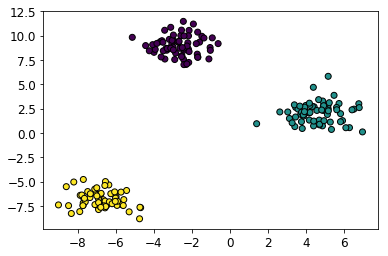

In [14]:
X, t = datasets.make_blobs(n_samples=200, n_features=2, centers=3, random_state=42)
plt.scatter(X[:,0], X[:,1], c=t, edgecolor='k')
plt.show()

xx, yy = get_meshgrid(X[:, 0], X[:, 1], nx=100, ny=100, margin=0.1)

Let us train our logistic regression classifier by three solvers.

success : True
nit : 693
calcualtion time : 0.20700621604919434seconds


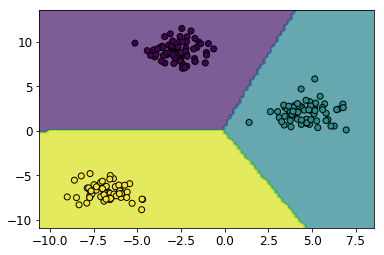

In [15]:
clf = LogisticClf(C = 3, lam = 1.0)
clf.fit(X, t, show_message=True, method='gd', alpha=0.01)
ax = plt.subplot(111)
plot_result(ax, clf, xx, yy, X, t)

success : True
nit : 8
calcualtion time : 0.015000104904174805seconds


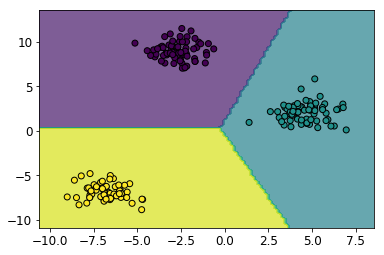

In [16]:
clf = LogisticClf(C = 3, lam = 1.0)
clf.fit(X, t, show_message=True, method='newton')
ax = plt.subplot(111)
plot_result(ax, clf, xx, yy, X, t)

success : True
nit : 8
calcualtion time : 0.012000799179077148seconds


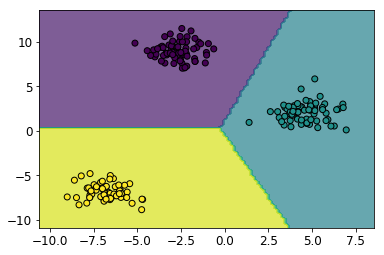

In [17]:
clf = LogisticClf(C = 3, lam = 1.0)
clf.fit(X, t, show_message=True, method='newton-cg')
ax = plt.subplot(111)
plot_result(ax, clf, xx, yy, X, t)

We can see that data are completely separated, and the decision boundaries are straight, because we employed 'linear' basis functions. 

Moreover, Newton method and Newton-CG method converge much faster compared with gradient descent method in terms of both iteration number and real computational time. Note that in this case we have $MC = 9$.

## 4.2 Hand-written digits

Let us try out larger data. Here, we use MNIST hand-written digits data.

In [33]:
digits = datasets.load_digits()
dat_train, dat_test, label_train, label_test = train_test_split(digits.data, digits.target, test_size=0.25)

print(f"Training data : {len(dat_train)}")
print(f"Test data : {len(dat_test)}")
print(f"Input dimension : {dat_train.shape[1]}")

Training data : 1347
Test data : 450
Input dimension : 64


Thus, in training phase, we have $N=1347$, $M=65$, $C=10$, and hence $MC = 650$.

In [34]:
def show_result_digit(clf):
    label_test_pred = clf.predict(dat_test)
    print(f"train accuracy score: {accuracy_score(label_train, clf.predict(dat_train))}")
    print(f"test accuracy score: {accuracy_score(label_test, label_test_pred)}")

Let us compare the results for three solvers.

In [35]:
clf = LogisticClf(C=10, lam=1.0)
clf.fit(dat_train, label_train, method='gd', alpha=0.01, show_message=True)
show_result_digit(clf)

success : True
nit : 2065
calcualtion time : 3.0380754470825195seconds
train accuracy score: 0.9977728285077951
test accuracy score: 0.9733333333333334


In [36]:
clf = LogisticClf(C=10, lam=1.0)
clf.fit(dat_train, label_train, method='newton', show_message=True)
show_result_digit(clf)

success : True
nit : 9
calcualtion time : 23.935264348983765seconds
train accuracy score: 1.0
test accuracy score: 0.9666666666666667


In [37]:
clf = LogisticClf(C=10, lam=1.0)
clf.fit(dat_train, label_train, method='newton-cg', show_message=True)
show_result_digit(clf)

success : True
nit : 9
calcualtion time : 1.0520105361938477seconds
train accuracy score: 1.0
test accuracy score: 0.9666666666666667


It can be seen that 
* The numbers of iteration for Newton and Newton-CG method are much smaller compared with that of gradient descent method. 
* Newton method takes quite a long time, while Newton-CG method terminates much faster. This is because Newton-CG method requires less computational cost in solving the linear equation which appeared in the update equation.

Interestingly, 
* In gradient descent case, training accuracy does not reach 1.0, which Newton method attained, because in this case the iteration can terminate before it reaches true minimum.
* However, the test accuracy for gradient descent training is better than that for Newton method.

It seems that this is an example of early stopping.

Below, we use Newton-CG method to train logistic regression classifier with different values of regularization parameter. We can see that, as we increase the regularization parameter, the training score gets worse, while the test score gets better, which is consistent with our intuition that larger regularization means larger bias and smaller variance.

In [39]:
lams = [0.03, 1.0, 30.0]

for lam in lams:
    print(f"lambda = {lam}")
    clf = LogisticClf(C=10, lam=lam)
    clf.fit(dat_train, label_train, method='newton-cg', show_message=True)
    show_result_digit(clf)

lambda = 0.03
success : True
nit : 12
calcualtion time : 3.8450474739074707seconds
train accuracy score: 1.0
test accuracy score: 0.9666666666666667
lambda = 1.0
success : True
nit : 9
calcualtion time : 1.0370075702667236seconds
train accuracy score: 1.0
test accuracy score: 0.9666666666666667
lambda = 30.0
success : True
nit : 7
calcualtion time : 0.31400346755981445seconds
train accuracy score: 0.9977728285077951
test accuracy score: 0.9711111111111111


# Appendix scikit-learn

In this appendix, we demonstrate how we can use the scikit-learn library to perform logistic regression.

For detail, see official documentations ( http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html ).

In [24]:
from sklearn.linear_model import LogisticRegression

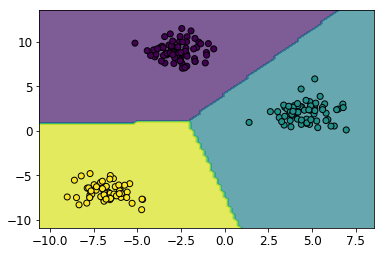

In [25]:
clf = LogisticRegression(solver='newton-cg', multi_class='multinomial')
clf.fit(X, t)
ax = plt.subplot(111)
plot_result(ax, clf, xx, yy, X, t)

In [26]:
clf = LogisticRegression(solver='newton-cg', multi_class='multinomial')
clf.fit(dat_train, label_train)
show_result_digit(clf)

train accuracy score: 1.0
test accuracy score: 0.9555555555555556
